In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv(r"D:\Download\Regression\Real estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
# Features (all columns except "Y house price of unit area")
X = data.iloc[:, 1:7]  # Exclude the first column 'No' and target 'Y'
y = data["Y house price of unit area"]

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (414, 6)
Target shape: (414,)


In [5]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the KNN Regressor
k = 10
knn = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [8]:
# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)

Mean Squared Error: 43.002295180722896
R-Squared Score: 0.7436673779892873


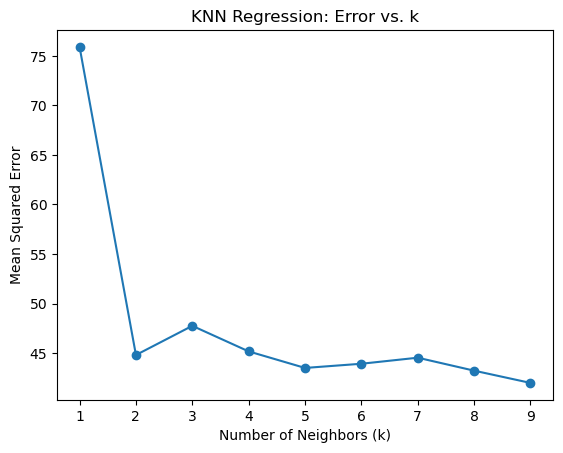

In [9]:
errors = []
k_values = range(1, 10)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

# Plot the error for different k values
plt.plot(k_values, errors, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression: Error vs. k")
plt.show()

In [10]:
# Find the index of the minimum error
best_k_index = errors.index(min(errors))

# Get the best value of k
best_k = k_values[best_k_index]

# Print the best value of k and its corresponding MSE
print("Best value of k:", best_k)
print("Corresponding Mean Squared Error:", errors[best_k_index])

Best value of k: 9
Corresponding Mean Squared Error: 41.98442213297635


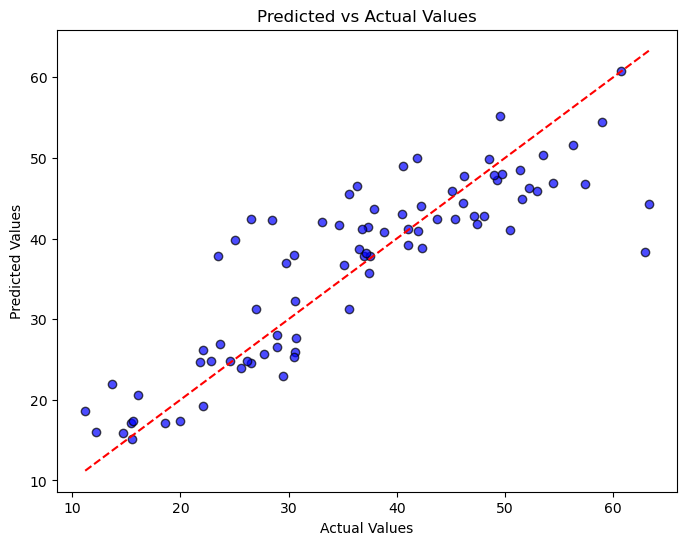

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black', alpha=0.7)

# Add a reference line where predicted = actual
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()